In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sc_func import *

## 数据导入

In [380]:
#诺亚点点17年1101-1201
data_form1= pd.read_csv('D:\\python\\huabao\\tmp_score_nuoya_variable0427_3.csv')
#诺亚点点17年12/02-18年01/08
data_form2= pd.read_csv('D:\\python\\huabao\\tmp_score_nuoya_variablerank0427_1.csv')
#诺亚点点2018-02/10-02/25数据
data_form3 = pd.read_csv('D:\\python\\huabao\\tmp_score_nuoya_variablerank0427_2.csv')
#诺亚点点2018-02/10-02/25数据
data_form4 = pd.read_csv('D:\\python\\huabao\\tmp_score_nuoya_variable0508_2.csv')

In [381]:
data_form=data_form1
#data_form=data_form1.append(data_form2)

In [382]:
data_form.shape

(4465, 58)

In [383]:
x_columns = [x for x in data_form.columns if x not in ['type']]
keep_list = x_columns
target = 'type'

In [384]:
#样本的bad_rate
data_form[data_form['type']==1].shape[0]/data_form.shape[0]

0.08286674132138858

## 变量筛选

In [385]:
#相关性删除
df=data_form
corr=df.corr()

In [386]:
corr.columns

Index(['type', 'cs_size_s_ctn_l_rel_m', 'cs_size_s_ctn_m_rel_m',
       'cs_size_s_ctn_m_rel_l', 'cs_size_s_ctn_l_rel_l', 'cs', 'od',
       'ls_od_b_6m', 'ls_od_b_1y', 'ls_od_b_2y', 'ls_od_f_1t', 'ls_od_f_3t',
       'ls_od_f_6t', 'xc_behavior', 'xc_overloan', 'xc_overdue', 'xc_record',
       'lp_p1_xc_behavior', 'lp_p1_xc_overloan', 'lp_p1_xc_overdue',
       'lp_p1_xc_record', 'rv', 'rc_idname_multi', 'rc_relation_age',
       'rc_relation_cnt_name_phone', 'rc_relation_multi', 'rc_relation_cnt',
       'ls_cr', 'ls_cr_cl', 'ls_gp', 'ls_gp_cl', 'ls_nw', 'ls_nd',
       'ld_gps5_od', 'ld_gps5_rc', 'ld_gps5_xc', 'ld_add5_od', 'ld_add5_rc',
       'ld_add5_xc_ml', 'ld_add5_xc_m', 'lp_p1_ld_add5_od', 'lp_p1_ld_add5_rc',
       'lp_p1_ld_add5_xc_ml', 'lp_p1_ld_add5_xc_m', 'cg_add5', 'bs_gps5',
       'bs_add5_id6plus_dist_c', 'bs_add5_id6plus_dist_vf',
       'bs_add5_id6plus_dist_vc', 'bs_add5_id6plus_dist_f',
       'lp_p1_ld_idnbr_6plus_xcp', 'lp_p1_vl_idnbr', 'bd_addr_abn_apply',
   

In [387]:
type(corr.columns)

pandas.indexes.base.Index

In [388]:
x_columns = [x for x in corr.columns if x not in ['type']]
x_columns

['cs_size_s_ctn_l_rel_m',
 'cs_size_s_ctn_m_rel_m',
 'cs_size_s_ctn_m_rel_l',
 'cs_size_s_ctn_l_rel_l',
 'cs',
 'od',
 'ls_od_b_6m',
 'ls_od_b_1y',
 'ls_od_b_2y',
 'ls_od_f_1t',
 'ls_od_f_3t',
 'ls_od_f_6t',
 'xc_behavior',
 'xc_overloan',
 'xc_overdue',
 'xc_record',
 'lp_p1_xc_behavior',
 'lp_p1_xc_overloan',
 'lp_p1_xc_overdue',
 'lp_p1_xc_record',
 'rv',
 'rc_idname_multi',
 'rc_relation_age',
 'rc_relation_cnt_name_phone',
 'rc_relation_multi',
 'rc_relation_cnt',
 'ls_cr',
 'ls_cr_cl',
 'ls_gp',
 'ls_gp_cl',
 'ls_nw',
 'ls_nd',
 'ld_gps5_od',
 'ld_gps5_rc',
 'ld_gps5_xc',
 'ld_add5_od',
 'ld_add5_rc',
 'ld_add5_xc_ml',
 'ld_add5_xc_m',
 'lp_p1_ld_add5_od',
 'lp_p1_ld_add5_rc',
 'lp_p1_ld_add5_xc_ml',
 'lp_p1_ld_add5_xc_m',
 'cg_add5',
 'bs_gps5',
 'bs_add5_id6plus_dist_c',
 'bs_add5_id6plus_dist_vf',
 'bs_add5_id6plus_dist_vc',
 'bs_add5_id6plus_dist_f',
 'lp_p1_ld_idnbr_6plus_xcp',
 'lp_p1_vl_idnbr',
 'bd_addr_abn_apply',
 'bd_gps5_abn_apply',
 'bd_addr_abn_spend',
 'bd_gps5_abn

In [12]:
corr[abs(corr)>0.5]

,type,cs_size_s,cs_size_s_ctn_l_rel_m,cs_size_s_ctn_m_rel_m,cs_size_s_ctn_m_rel_l,cs_size_s_ctn_l_rel_l,cs,od,ls_od_b_6m,ls_od_b_1y,...,bs_add5_id6plus_dist_vc,bs_add5_id6plus_dist_f,lp_p1_ld_idnbr_6plus_xcp,lp_p1_vl_idnbr,bd_addr_abn_apply,bd_gps5_abn_apply,bd_addr_abn_spend,bd_gps5_abn_spend,dist_gps5_abn_beh,dist_gps5_abn_spend
type,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cs_size_s,NaN,1.000000,NaN,NaN,NaN,0.693626,0.869574,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cs_size_s_ctn_l_rel_m,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cs_size_s_ctn_m_rel_m,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cs_size_s_ctn_m_rel_l,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cs_size_s_ctn_l_rel_l,NaN,0.693626,NaN,NaN,NaN,1.000000,0.603159,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cs,NaN,0.869574,NaN,NaN,NaN,0.603159,1.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
od,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.670479,0.558995,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ls_od_b_6m,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.670479,1.000000,0.729237,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ls_od_b_1y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.558995,0.729237,1.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## VAR BINNING RESULT 变量分组结果

In [13]:
#先平均分组看各变量的IV值
num_iv = pd.Series()
columns=list(data_form.columns)
for c in range(1,len(columns)):
         num_iv = num_iv.append(variable_binning(data_form, target,columns[c], 5,'iv'))
print(num_iv)

C:\Users\xiongjun\AppData\Local\Continuum\Anaconda3\lib\site-packages\pandas\core\generic.py:3295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
C:\Users\xiongjun\sc_func.py:120: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df['qt_binning'] = df[var].apply(lambda x: map_dict[x])


cs_size_s                     3.104139e-03
cs_size_s_ctn_l_rel_m         4.930381e-30
cs_size_s_ctn_m_rel_m         4.930381e-30
cs_size_s_ctn_m_rel_l         4.930381e-30
cs_size_s_ctn_l_rel_l         4.930381e-30
cs                            2.136198e-03
od                            4.930381e-30
ls_od_b_6m                    4.930381e-30
ls_od_b_1y                    4.930381e-30
ls_od_b_2y                    4.930381e-30
ls_od_f_1t                    4.930381e-30
ls_od_f_3t                    4.930381e-30
ls_od_f_6t                    4.930381e-30
xc_behavior                   4.930381e-30
xc_overloan                   6.072024e-03
xc_overdue                    4.930381e-30
xc_record                     4.930381e-30
lp_p1_xc_behavior             4.930381e-30
lp_p1_xc_overloan             4.930381e-30
lp_p1_xc_overdue              4.930381e-30
lp_p1_xc_record               4.930381e-30
rv                            4.930381e-30
rc_idname_multi               4.930381e-30
rc_relation

## 逐个变量分组观察IV、占比、分组比例

C:\Users\xiongjun\AppData\Local\Continuum\Anaconda3\lib\site-packages\pandas\core\generic.py:3295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
C:\Users\xiongjun\sc_func.py:124: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df['qt_binning'] = var_bins_series(df[var], bins, side = side)


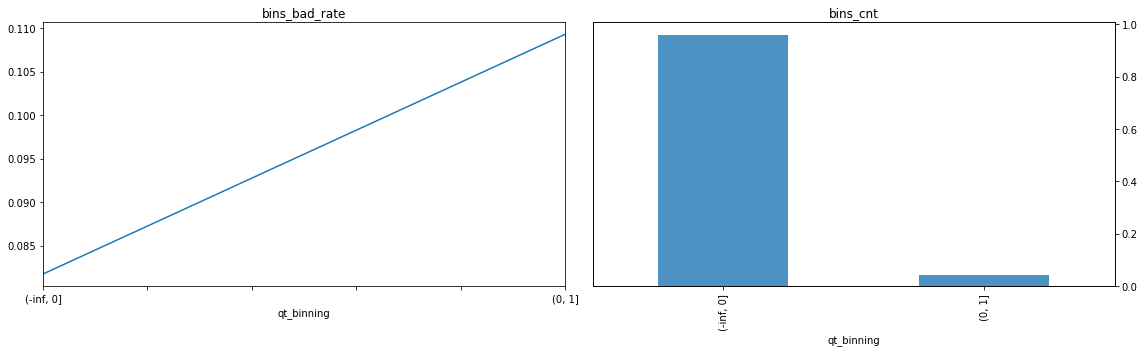

cs_size_s_ctn_l_rel_m 变量的IV值为 0.004573383695258446


,Lbound,Ubound,Totalcnt,PctTotal,Y_count,n_Y_count,Y_pct,n_Y_pct,Y_rate,WOE,IV
qt_binning,,,,,,,,,,,
"(-inf, 0]",0,0,4282,0.959015,350,3932,0.945946,0.960195,0.081738,-0.014951,0.000213
"(0, 1]",1,1,183,0.040985,20,163,0.054054,0.039805,0.109290,0.306001,0.004360


In [538]:
var_name = 'cs_size_s_ctn_l_rel_m' #变量
var_bin = variable_binning(data_form, target, var_name, [0,1], 'bins')
binning_plot(var_bin)
print(var_name,'变量的IV值为',var_bin['IV'].sum())
var_bin_cs=var_bin['WOE']
var_bin.sort_values('Lbound')


C:\Users\xiongjun\AppData\Local\Continuum\Anaconda3\lib\site-packages\pandas\core\generic.py:3295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
C:\Users\xiongjun\sc_func.py:124: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df['qt_binning'] = var_bins_series(df[var], bins, side = side)


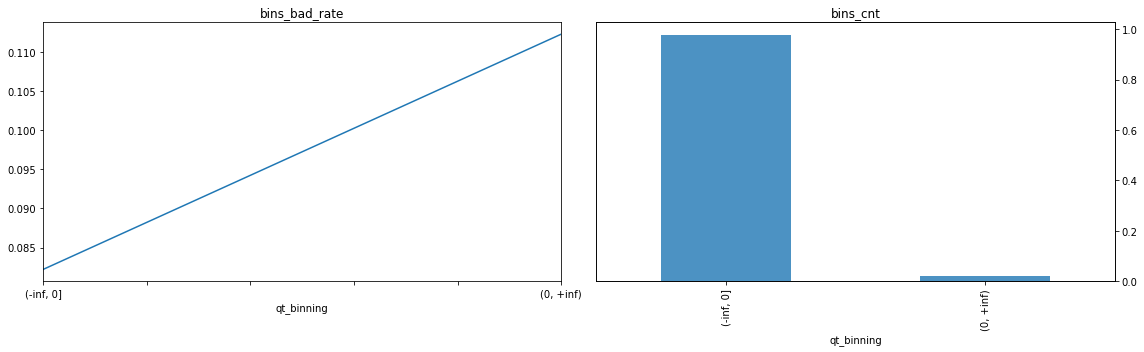

cg_add5 变量的IV值为 0.0029246464114060945


,Lbound,Ubound,Totalcnt,PctTotal,Y_count,n_Y_count,Y_pct,n_Y_pct,Y_rate,WOE,IV
qt_binning,,,,,,,,,,,
"(-inf, 0]",0,0,4367,0.978052,359,4008,0.97027,0.978755,0.082207,-0.008706,0.000074
"(0, +inf)",1,1,98,0.021948,11,87,0.02973,0.021245,0.112245,0.336006,0.002851


In [539]:
var_name = 'cg_add5' #变量
var_bin = variable_binning(data_form, target, var_name, [0], 'bins')
binning_plot(var_bin)
print(var_name,'变量的IV值为',var_bin['IV'].sum())
var_bin_od=var_bin['WOE']
var_bin.sort_values('Lbound')


C:\Users\xiongjun\AppData\Local\Continuum\Anaconda3\lib\site-packages\pandas\core\generic.py:3295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
C:\Users\xiongjun\sc_func.py:124: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df['qt_binning'] = var_bins_series(df[var], bins, side = side)


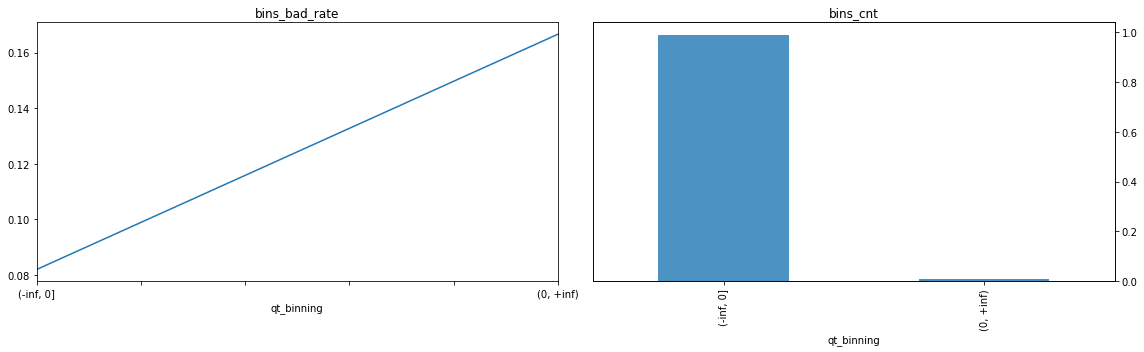

lp_p1_xc_overloan 变量的IV值为 0.00956140593837055


,Lbound,Ubound,Totalcnt,PctTotal,Y_count,n_Y_count,Y_pct,n_Y_pct,Y_rate,WOE,IV
qt_binning,,,,,,,,,,,
"(-inf, 0]",0,0,4417,0.98925,362,4055,0.978378,0.990232,0.081956,-0.012043,0.000143
"(0, +inf)",1,1,48,0.01075,8,40,0.021622,0.009768,0.166667,0.794581,0.009419


In [541]:
var_name = 'lp_p1_xc_overloan' #变量
var_bin = variable_binning(data_form, target, var_name, [0], 'bins')
binning_plot(var_bin)
print(var_name,'变量的IV值为',var_bin['IV'].sum())
var_bin_xc_behavior=var_bin['WOE']
var_bin.sort_values('Lbound')


C:\Users\xiongjun\AppData\Local\Continuum\Anaconda3\lib\site-packages\pandas\core\generic.py:3295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
C:\Users\xiongjun\sc_func.py:124: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df['qt_binning'] = var_bins_series(df[var], bins, side = side)


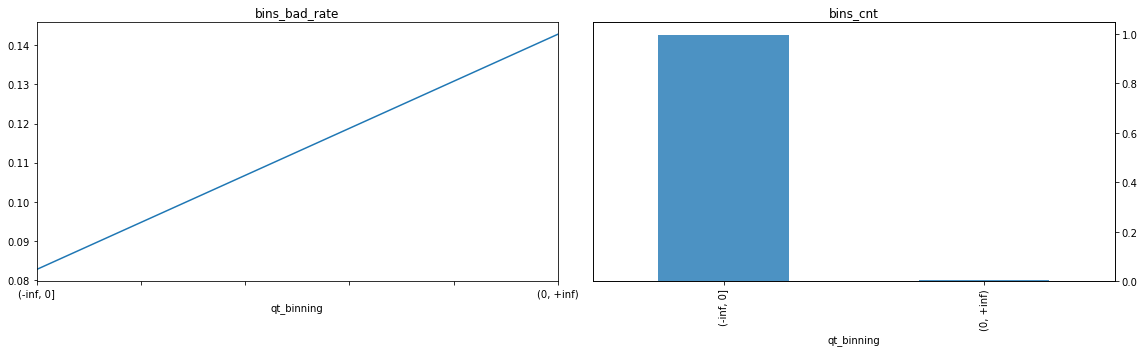

ld_add5_rc 变量的IV值为 0.0015214951092035402


,Lbound,Ubound,Totalcnt,PctTotal,Y_count,n_Y_count,Y_pct,n_Y_pct,Y_rate,WOE,IV
qt_binning,,,,,,,,,,,
"(-inf, 0]",0,0,4451,0.996865,368,4083,0.994595,0.99707,0.082678,-0.002485,0.000006
"(0, +inf)",1,1,14,0.003135,2,12,0.005405,0.00293,0.142857,0.612260,0.001515


In [542]:
var_name = 'ld_add5_rc' #变量
var_bin = variable_binning(data_form, target, var_name, [0], 'bins')
binning_plot(var_bin)
print(var_name,'变量的IV值为',var_bin['IV'].sum())
var_bin_xc_overloan=var_bin['WOE']
var_bin.sort_values('Lbound')

C:\Users\xiongjun\AppData\Local\Continuum\Anaconda3\lib\site-packages\pandas\core\generic.py:3295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
C:\Users\xiongjun\sc_func.py:124: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df['qt_binning'] = var_bins_series(df[var], bins, side = side)


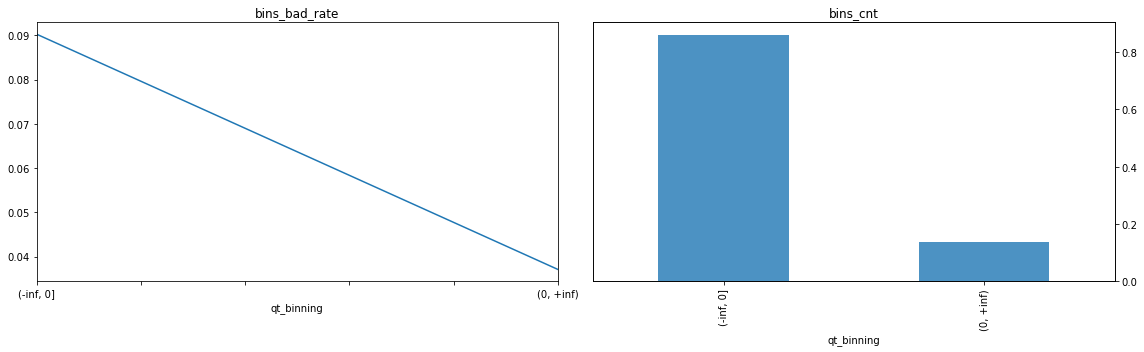

ls_nd 变量的IV值为 0.07909297328395969


,Lbound,Ubound,Totalcnt,PctTotal,Y_count,n_Y_count,Y_pct,n_Y_pct,Y_rate,WOE,IV
qt_binning,,,,,,,,,,,
"(-inf, 0]",0,0,3845,0.861142,347,3498,0.937838,0.854212,0.090247,0.093397,0.007810
"(0, +inf)",1,1,620,0.138858,23,597,0.062162,0.145788,0.037097,-0.852404,0.071283


In [543]:
var_name = 'ls_nd' #变量
var_bin = variable_binning(data_form, target, var_name, [0], 'bins')
binning_plot(var_bin)
print(var_name,'变量的IV值为',var_bin['IV'].sum())
var_bin_xc_overdue=var_bin['WOE']
var_bin.sort_values('Lbound')

C:\Users\xiongjun\AppData\Local\Continuum\Anaconda3\lib\site-packages\pandas\core\generic.py:3295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
C:\Users\xiongjun\sc_func.py:124: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df['qt_binning'] = var_bins_series(df[var], bins, side = side)


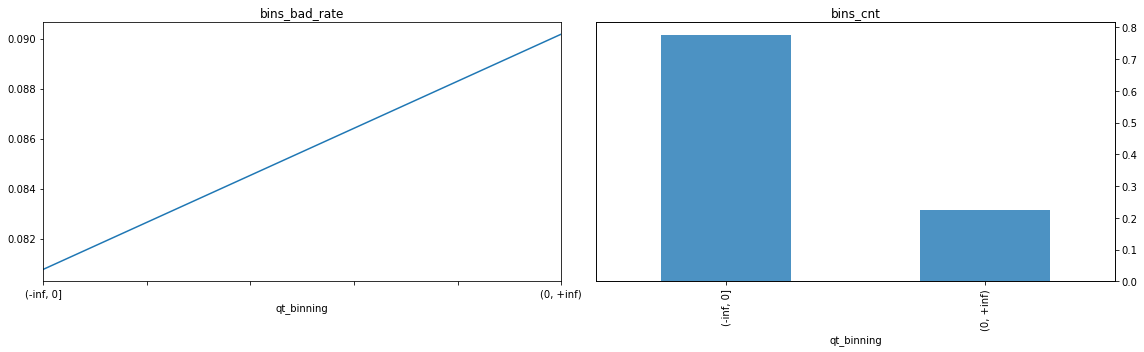

bs_add5_id6plus_dist_vf 变量的IV值为 0.002594272901707937


,Lbound,Ubound,Totalcnt,PctTotal,Y_count,n_Y_count,Y_pct,n_Y_pct,Y_rate,WOE,IV
qt_binning,,,,,,,,,,,
"(-inf, 0]",0,0,3467,0.776484,280,3187,0.756757,0.778266,0.080761,-0.028027,0.000603
"(0, +inf)",1,1,998,0.223516,90,908,0.243243,0.221734,0.090180,0.092584,0.001991


In [546]:
var_name = 'bs_add5_id6plus_dist_vf' #变量
var_bin = variable_binning(data_form, target, var_name, [0], 'bins')
binning_plot(var_bin)
print(var_name,'变量的IV值为',var_bin['IV'].sum())
var_bin_xc_record=var_bin['WOE']
var_bin.sort_values('Lbound')

C:\Users\xiongjun\AppData\Local\Continuum\Anaconda3\lib\site-packages\pandas\core\generic.py:3295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
C:\Users\xiongjun\sc_func.py:124: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df['qt_binning'] = var_bins_series(df[var], bins, side = side)


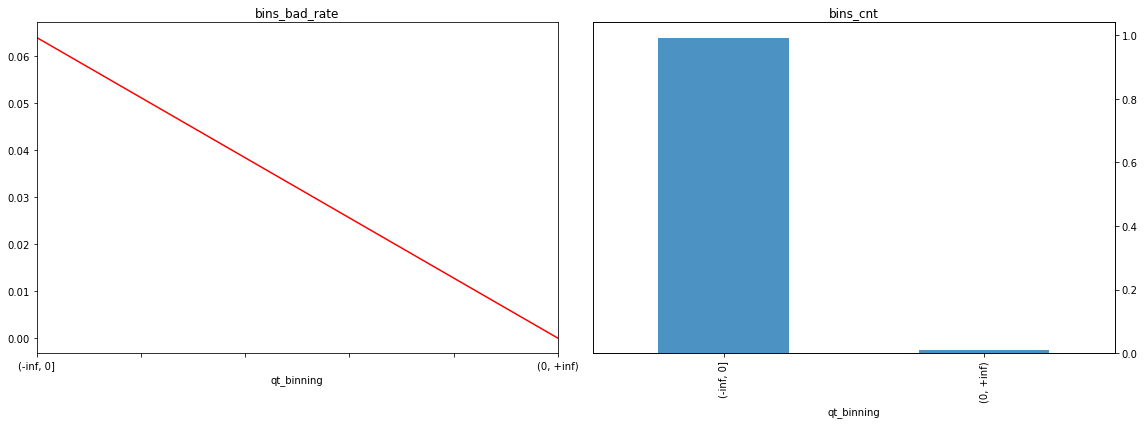

ls_cr 变量的IV值为 0.09411972808235165


,Lbound,Ubound,Totalcnt,PctTotal,Y_count,n_Y_count,Y_pct,n_Y_pct,Y_rate,WOE,IV
qt_binning,,,,,,,,,,,
"(-inf, 0]",0,0,8718,0.990457,557,8161,1.000000,0.989812,0.063891,0.010240,0.000104
"(0, +inf)",1,1,84,0.009543,0,84,0.000001,0.010188,0.000000,-9.228965,0.094015


In [33]:
var_name = 'ls_cr' #变量
var_bin = variable_binning(data_form, target, var_name, [0], 'bins')
binning_plot(var_bin)
print(var_name,'变量的IV值为',var_bin['IV'].sum())
var_bin_rv=var_bin['WOE']
var_bin.sort_values('Lbound')

C:\Users\xiongjun\AppData\Local\Continuum\Anaconda3\lib\site-packages\pandas\core\generic.py:3295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
C:\Users\xiongjun\sc_func.py:124: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df['qt_binning'] = var_bins_series(df[var], bins, side = side)


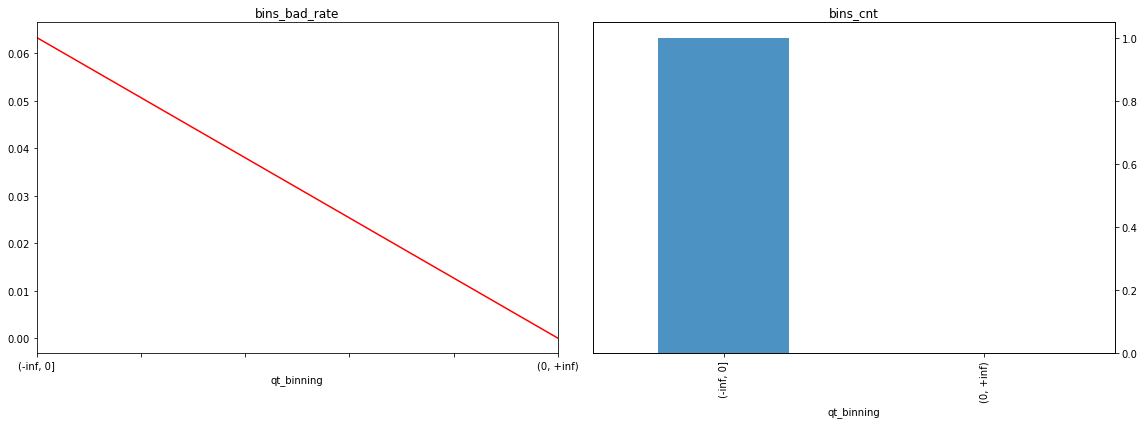

ls_cr_cl 变量的IV值为 0.004789506468831258


,Lbound,Ubound,Totalcnt,PctTotal,Y_count,n_Y_count,Y_pct,n_Y_pct,Y_rate,WOE,IV
qt_binning,,,,,,,,,,,
"(-inf, 0]",0,0,8796,0.999318,557,8239,1.000000,0.999272,0.063324,0.000728,5.297601e-07
"(0, +inf)",1,1,6,0.000682,0,6,0.000001,0.000728,0.000000,-6.589908,4.788977e-03


In [34]:
var_name = 'ls_cr_cl' #变量
var_bin = variable_binning(data_form, target, var_name, [0], 'bins')
binning_plot(var_bin)
print(var_name,'变量的IV值为',var_bin['IV'].sum())
var_bin.sort_values('Lbound')

C:\Users\xiongjun\AppData\Local\Continuum\Anaconda3\lib\site-packages\pandas\core\generic.py:3295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
C:\Users\xiongjun\sc_func.py:124: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df['qt_binning'] = var_bins_series(df[var], bins, side = side)


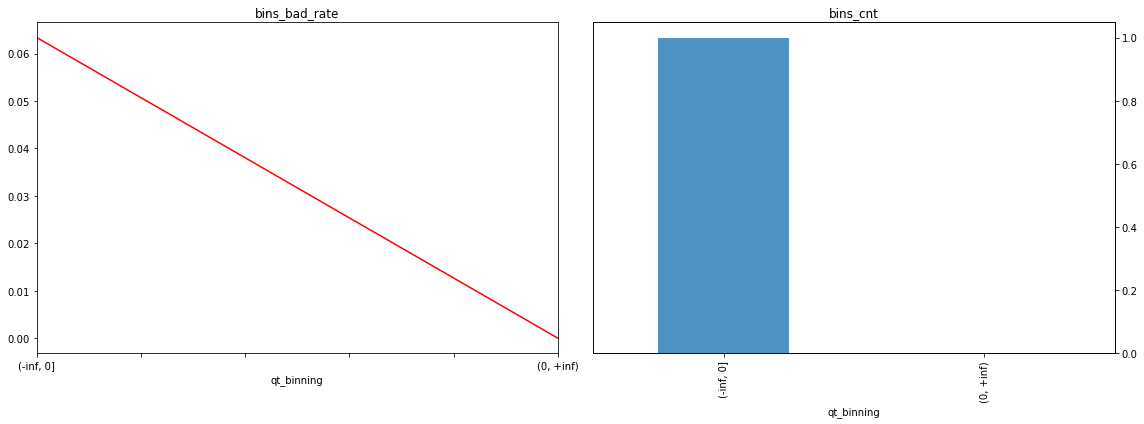

ls_gp 变量的IV值为 0.014687744242890925


,Lbound,Ubound,Totalcnt,PctTotal,Y_count,n_Y_count,Y_pct,n_Y_pct,Y_rate,WOE,IV
qt_binning,,,,,,,,,,,
"(-inf, 0]",0,0,8786,0.998182,557,8229,1.000000,0.998059,0.063396,0.001942,0.000004
"(0, +inf)",1,1,16,0.001818,0,16,0.000001,0.001941,0.000000,-7.570737,0.014684


In [35]:
var_name = 'ls_gp' #变量
var_bin = variable_binning(data_form, target, var_name, [0], 'bins')
binning_plot(var_bin)
print(var_name,'变量的IV值为',var_bin['IV'].sum())
var_bin_ls_cr=var_bin['WOE']
var_bin.sort_values('Lbound')

C:\Users\xiongjun\AppData\Local\Continuum\Anaconda3\lib\site-packages\pandas\core\generic.py:3295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
C:\Users\xiongjun\sc_func.py:124: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df['qt_binning'] = var_bins_series(df[var], bins, side = side)
C:\Users\xiongjun\AppData\Local\Continuum\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:2903: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=0.0, right=0.0
  'left=%s, right=%s') % (left, right))


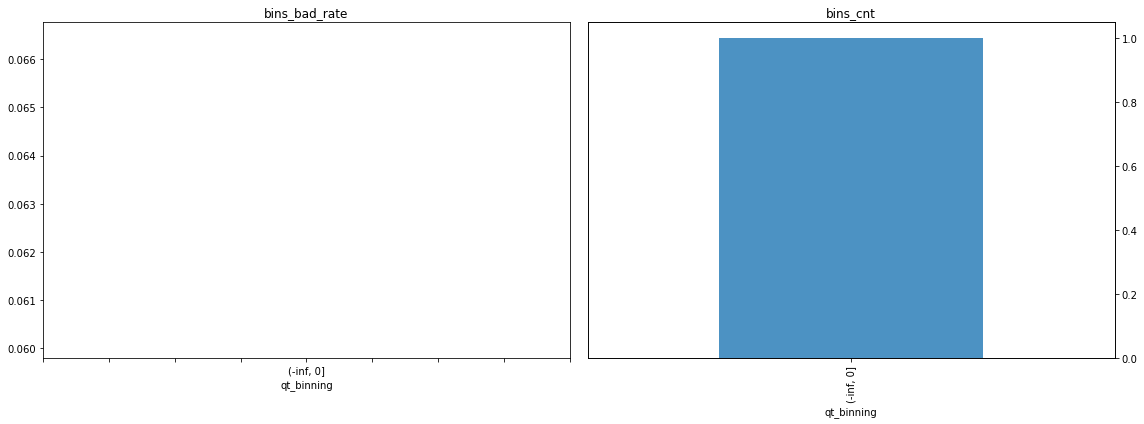

ls_gp_cl 变量的IV值为 4.9303806576313294e-30


,Lbound,Ubound,Totalcnt,PctTotal,Y_count,n_Y_count,Y_pct,n_Y_pct,Y_rate,WOE,IV
qt_binning,,,,,,,,,,,
"(-inf, 0]",0,0,8802,1.0,557,8245,1.0,1.0,0.063281,-2.220446e-15,4.930381e-30


In [36]:
var_name = 'ls_gp_cl' #变量
var_bin = variable_binning(data_form, target, var_name, [0], 'bins')
binning_plot(var_bin)
print(var_name,'变量的IV值为',var_bin['IV'].sum())
var_bin_ls_cr_cl=var_bin['WOE']
var_bin.sort_values('Lbound')

C:\Users\xiongjun\AppData\Local\Continuum\Anaconda3\lib\site-packages\pandas\core\generic.py:3295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
C:\Users\xiongjun\sc_func.py:124: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df['qt_binning'] = var_bins_series(df[var], bins, side = side)


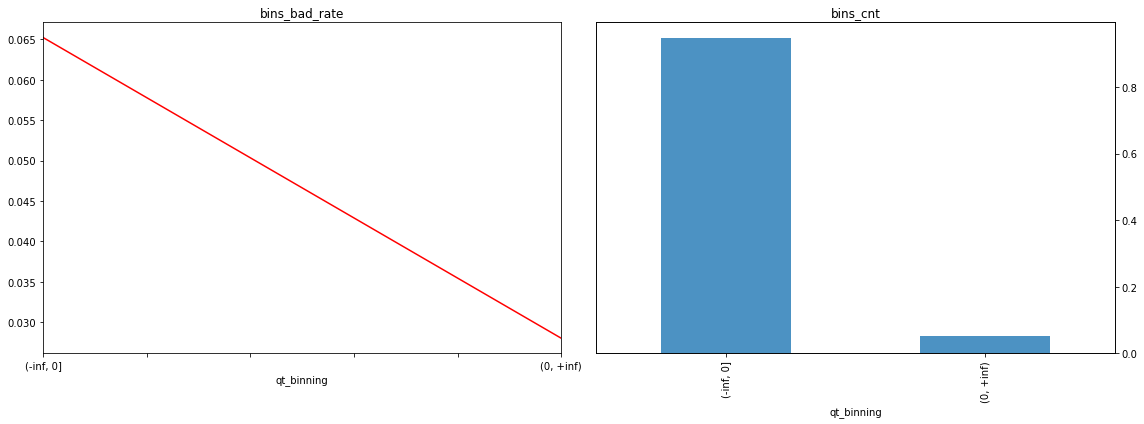

ls_nd 变量的IV值为 0.027733901262637407


,Lbound,Ubound,Totalcnt,PctTotal,Y_count,n_Y_count,Y_pct,n_Y_pct,Y_rate,WOE,IV
qt_binning,,,,,,,,,,,
"(-inf, 0]",0,0,8338,0.947285,544,7794,0.976661,0.9453,0.065243,0.032637,0.001024
"(0, +inf)",1,1,464,0.052715,13,451,0.023339,0.0547,0.028017,-0.851721,0.026710


In [38]:
var_name = 'ls_nd' #变量
var_bin = variable_binning(data_form, target, var_name, [0], 'bins')
binning_plot(var_bin)
print(var_name,'变量的IV值为',var_bin['IV'].sum())
var_bin_ls_gp=var_bin['WOE']
var_bin.sort_values('Lbound')

C:\Users\xiongjun\AppData\Local\Continuum\Anaconda3\lib\site-packages\pandas\core\generic.py:3295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
C:\Users\xiongjun\sc_func.py:124: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df['qt_binning'] = var_bins_series(df[var], bins, side = side)


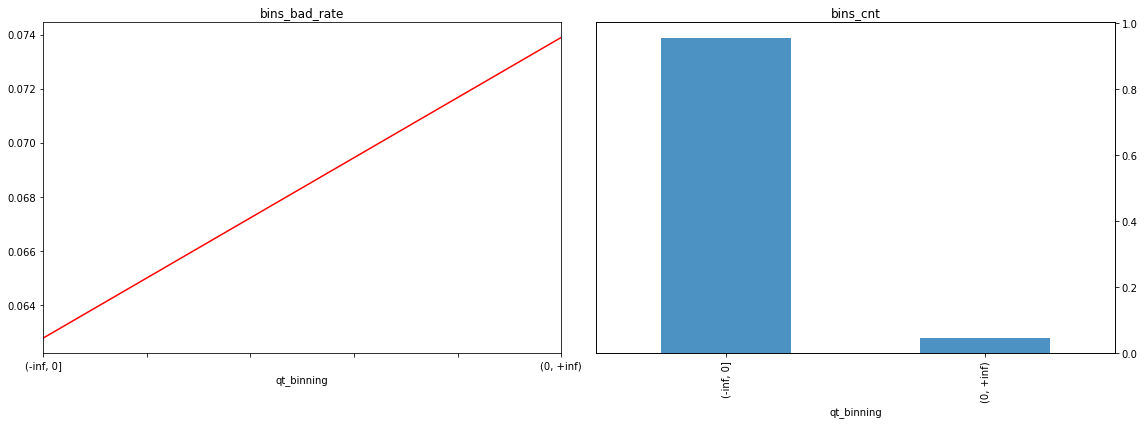

ld_gps5_xc 变量的IV值为 0.0014456751895825116


,Lbound,Ubound,Totalcnt,PctTotal,Y_count,n_Y_count,Y_pct,n_Y_pct,Y_rate,WOE,IV
qt_binning,,,,,,,,,,,
"(-inf, 0]",0,0,8396,0.953874,527,7869,0.94614,0.954397,0.062768,-0.008689,0.000072
"(0, +inf)",1,1,406,0.046126,30,376,0.05386,0.045603,0.073892,0.166405,0.001374


In [41]:
var_name = 'ld_gps5_xc' #变量
var_bin = variable_binning(data_form, target, var_name, [0], 'bins')
binning_plot(var_bin)
print(var_name,'变量的IV值为',var_bin['IV'].sum())
var_bin_ls_gp_cl=var_bin['WOE']
var_bin.sort_values('Lbound')

C:\Users\xiongjun\AppData\Local\Continuum\Anaconda3\lib\site-packages\pandas\core\generic.py:3295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
C:\Users\xiongjun\sc_func.py:124: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df['qt_binning'] = var_bins_series(df[var], bins, side = side)


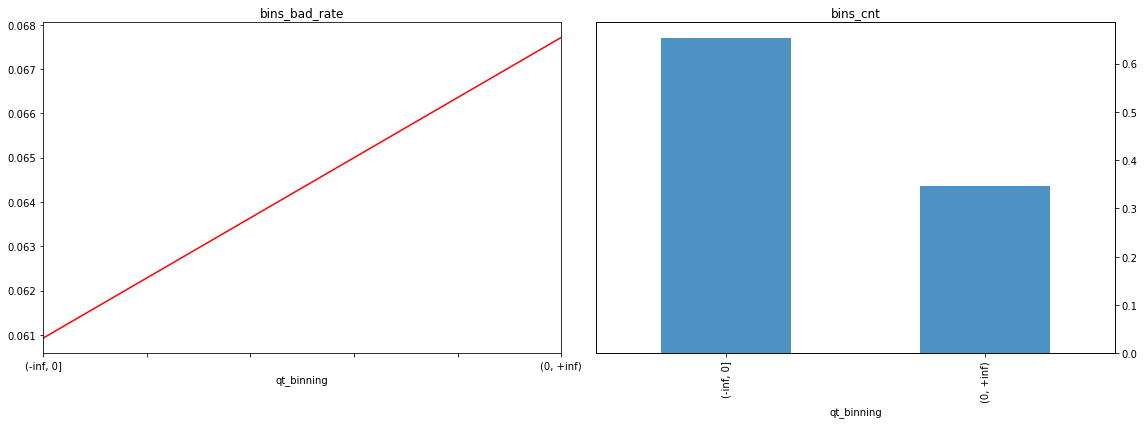

ld_add5_xc_m 变量的IV值为 0.002932999781514748


,Lbound,Ubound,Totalcnt,PctTotal,Y_count,n_Y_count,Y_pct,n_Y_pct,Y_rate,WOE,IV
qt_binning,,,,,,,,,,,
"(-inf, 0]",0,0,5745,0.652693,350,5395,0.628366,0.654336,0.060923,-0.040498,0.001052
"(0, +inf)",1,1,3057,0.347307,207,2850,0.371634,0.345664,0.067713,0.072442,0.001881


In [45]:
var_name = 'ld_add5_xc_m' #变量
var_bin = variable_binning(data_form, target, var_name, [0], 'bins')
binning_plot(var_bin)
print(var_name,'变量的IV值为',var_bin['IV'].sum())
var_bin_ls_nd=var_bin['WOE']
var_bin.sort_values('Lbound')

C:\Users\xiongjun\AppData\Local\Continuum\Anaconda3\lib\site-packages\pandas\core\generic.py:3295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
C:\Users\xiongjun\sc_func.py:124: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df['qt_binning'] = var_bins_series(df[var], bins, side = side)


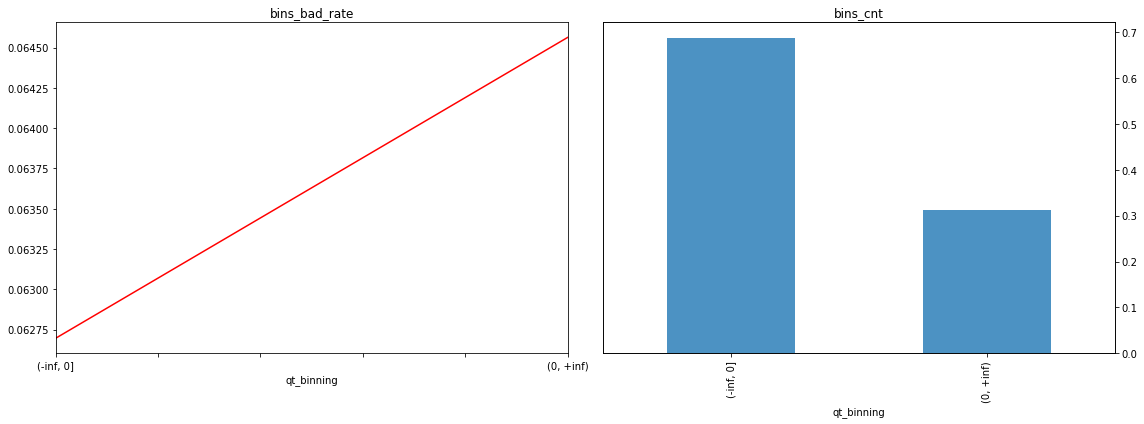

lp_p1_ld_add5_xc_m 变量的IV值为 0.0002122066943117168


,Lbound,Ubound,Totalcnt,PctTotal,Y_count,n_Y_count,Y_pct,n_Y_pct,Y_rate,WOE,IV
qt_binning,,,,,,,,,,,
"(-inf, 0]",0,0,6045,0.686776,379,5666,0.680431,0.687204,0.062696,-0.009905,0.000067
"(0, +inf)",1,1,2757,0.313224,178,2579,0.319569,0.312796,0.064563,0.021424,0.000145


In [49]:
var_name = 'lp_p1_ld_add5_xc_m' #变量
var_bin = variable_binning(data_form, target, var_name, [0], 'bins')
binning_plot(var_bin)
print(var_name,'变量的IV值为',var_bin['IV'].sum())
var_bin_ld_rc=var_bin['WOE']
var_bin.sort_values('Lbound')

C:\Users\xiongjun\AppData\Local\Continuum\Anaconda3\lib\site-packages\pandas\core\generic.py:3295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
C:\Users\xiongjun\sc_func.py:124: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df['qt_binning'] = var_bins_series(df[var], bins, side = side)


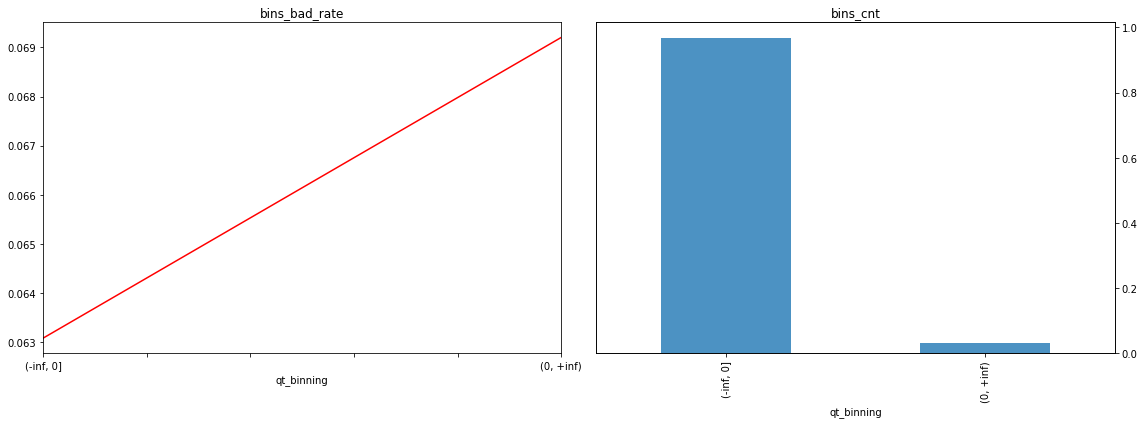

cg_add5 变量的IV值为 0.00032550581849121444


,Lbound,Ubound,Totalcnt,PctTotal,Y_count,n_Y_count,Y_pct,n_Y_pct,Y_rate,WOE,IV
qt_binning,,,,,,,,,,,
"(-inf, 0]",0,0,8513,0.967167,537,7976,0.964093,0.967374,0.063080,-0.003397,0.000011
"(0, +inf)",1,1,289,0.032833,20,269,0.035907,0.032626,0.069204,0.095818,0.000314


In [50]:
var_name = 'cg_add5' #变量
var_bin = variable_binning(data_form, target, var_name, [0], 'bins')
binning_plot(var_bin)
print(var_name,'变量的IV值为',var_bin['IV'].sum())
var_bin_ld_xc=var_bin['WOE']
var_bin.sort_values('Lbound')

C:\Users\xiongjun\AppData\Local\Continuum\Anaconda3\lib\site-packages\pandas\core\generic.py:3295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
C:\Users\xiongjun\sc_func.py:124: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df['qt_binning'] = var_bins_series(df[var], bins, side = side)


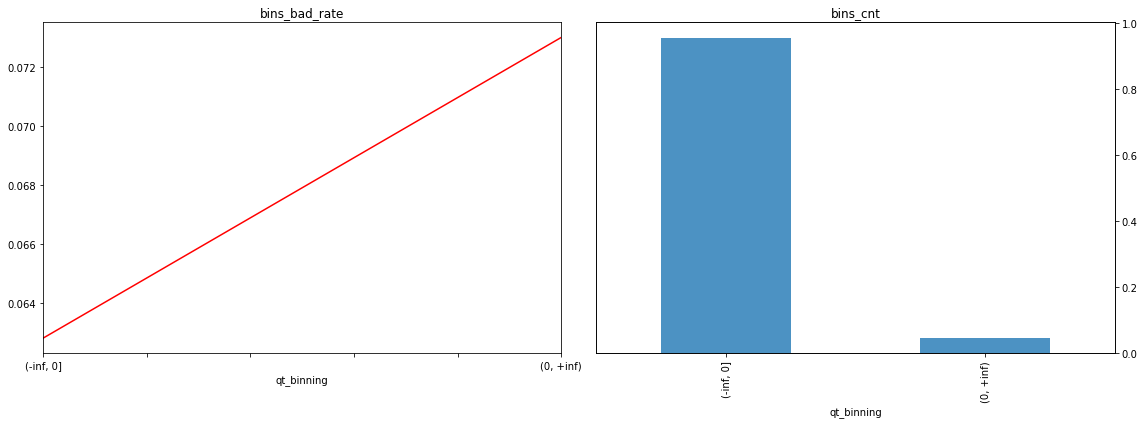

bs_gps5 变量的IV值为 0.0012335706845179725


,Lbound,Ubound,Totalcnt,PctTotal,Y_count,n_Y_count,Y_pct,n_Y_pct,Y_rate,WOE,IV
qt_binning,,,,,,,,,,,
"(-inf, 0]",0,0,8391,0.953306,527,7864,0.94614,0.95379,0.062805,-0.008053,0.000062
"(0, +inf)",1,1,411,0.046694,30,381,0.05386,0.04621,0.072993,0.153195,0.001172


In [51]:
var_name = 'bs_gps5' #变量
var_bin = variable_binning(data_form, target, var_name, [0], 'bins')
binning_plot(var_bin)
print(var_name,'变量的IV值为',var_bin['IV'].sum())
var_bin_bs_gps5=var_bin['WOE']
var_bin.sort_values('Lbound')

C:\Users\xiongjun\AppData\Local\Continuum\Anaconda3\lib\site-packages\pandas\core\generic.py:3295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
C:\Users\xiongjun\sc_func.py:124: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df['qt_binning'] = var_bins_series(df[var], bins, side = side)


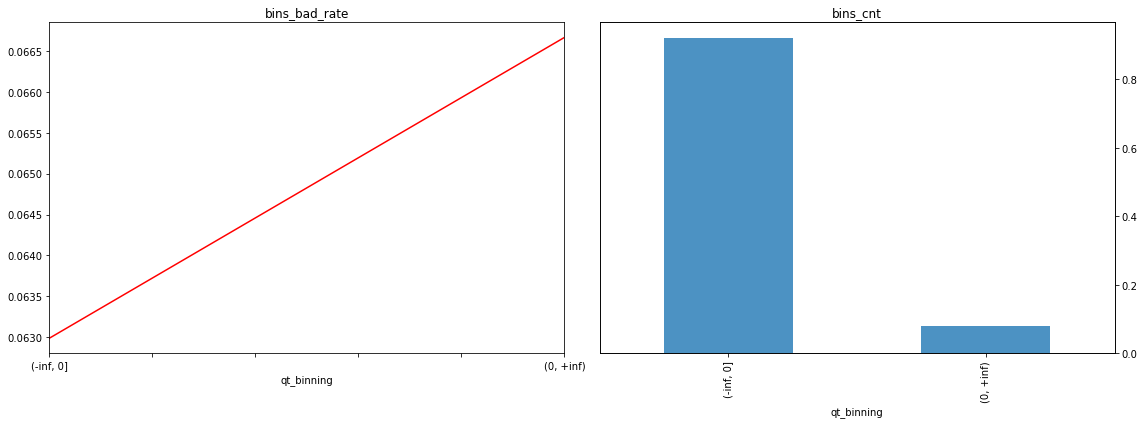

bs_add5_id6plus_dist_f 变量的IV值为 0.0002777897254336328


,Lbound,Ubound,Totalcnt,PctTotal,Y_count,n_Y_count,Y_pct,n_Y_pct,Y_rate,WOE,IV
qt_binning,,,,,,,,,,,
"(-inf, 0]",0,0,8097,0.919905,510,7587,0.915619,0.920194,0.062986,-0.004984,0.000023
"(0, +inf)",1,1,705,0.080095,47,658,0.084381,0.079806,0.066667,0.055740,0.000255


In [55]:
var_name = 'bs_add5_id6plus_dist_f' #变量
var_bin = variable_binning(data_form, target, var_name, [0], 'bins')
binning_plot(var_bin)
print(var_name,'变量的IV值为',var_bin['IV'].sum())
var_bin_ls_bs_add5=var_bin['WOE']
var_bin.sort_values('Lbound')

C:\Users\xiongjun\AppData\Local\Continuum\Anaconda3\lib\site-packages\pandas\core\generic.py:3295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
C:\Users\xiongjun\sc_func.py:124: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df['qt_binning'] = var_bins_series(df[var], bins, side = side)


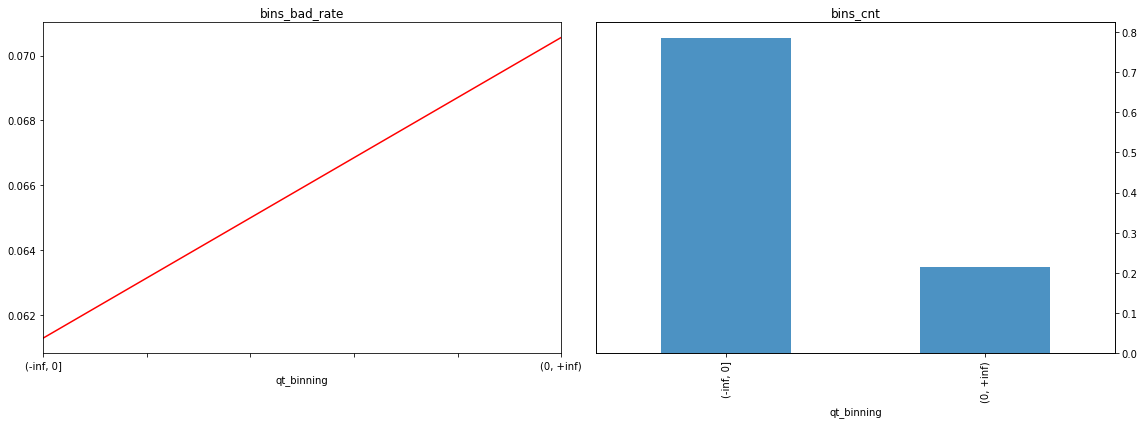

bs_add5_id6plus_dist_vf 变量的IV值为 0.004003303779463264


,Lbound,Ubound,Totalcnt,PctTotal,Y_count,n_Y_count,Y_pct,n_Y_pct,Y_rate,WOE,IV
qt_binning,,,,,,,,,,,
"(-inf, 0]",0,0,6903,0.784254,423,6480,0.759425,0.785931,0.061278,-0.034307,0.000909
"(0, +inf)",1,1,1899,0.215746,134,1765,0.240575,0.214069,0.070563,0.116731,0.003094


In [56]:
var_name = 'bs_add5_id6plus_dist_vf' #变量
var_bin = variable_binning(data_form, target, var_name, [0], 'bins')
binning_plot(var_bin)
print(var_name,'变量的IV值为',var_bin['IV'].sum())
var_bin_ls_bs_add5=var_bin['WOE']
var_bin.sort_values('Lbound')

C:\Users\xiongjun\AppData\Local\Continuum\Anaconda3\lib\site-packages\pandas\core\generic.py:3295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
C:\Users\xiongjun\sc_func.py:124: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df['qt_binning'] = var_bins_series(df[var], bins, side = side)


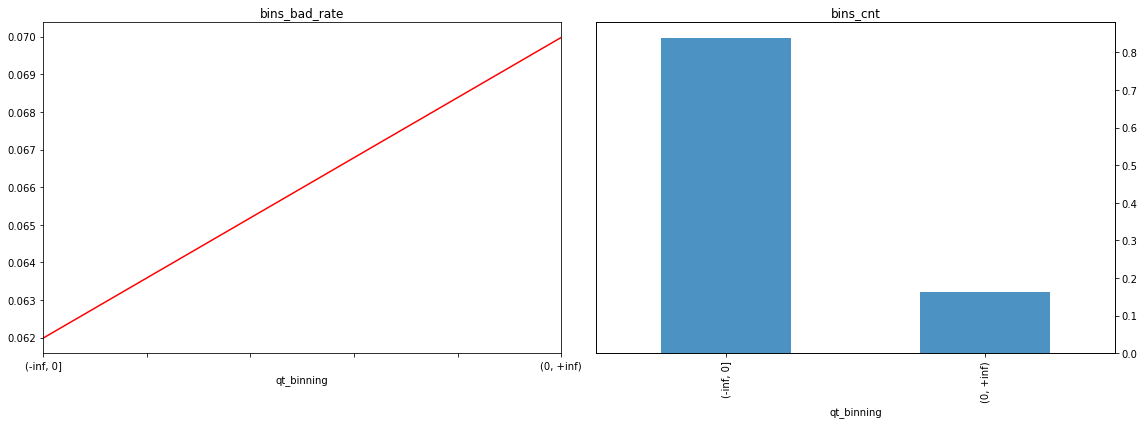

bs_add5_id6plus_dist_vc 变量的IV值为 0.0023829210871478754


,Lbound,Ubound,Totalcnt,PctTotal,Y_count,n_Y_count,Y_pct,n_Y_pct,Y_rate,WOE,IV
qt_binning,,,,,,,,,,,
"(-inf, 0]",0,0,7373,0.837651,457,6916,0.820467,0.838811,0.061983,-0.022112,0.000406
"(0, +inf)",1,1,1429,0.162349,100,1329,0.179533,0.161189,0.069979,0.107785,0.001977


In [57]:
var_name = 'bs_add5_id6plus_dist_vc' #变量
var_bin = variable_binning(data_form, target, var_name, [0], 'bins')
binning_plot(var_bin)
print(var_name,'变量的IV值为',var_bin['IV'].sum())
var_bin_ls_bs_add5=var_bin['WOE']
var_bin.sort_values('Lbound')

C:\Users\xiongjun\AppData\Local\Continuum\Anaconda3\lib\site-packages\pandas\core\generic.py:3295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
C:\Users\xiongjun\sc_func.py:124: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df['qt_binning'] = var_bins_series(df[var], bins, side = side)


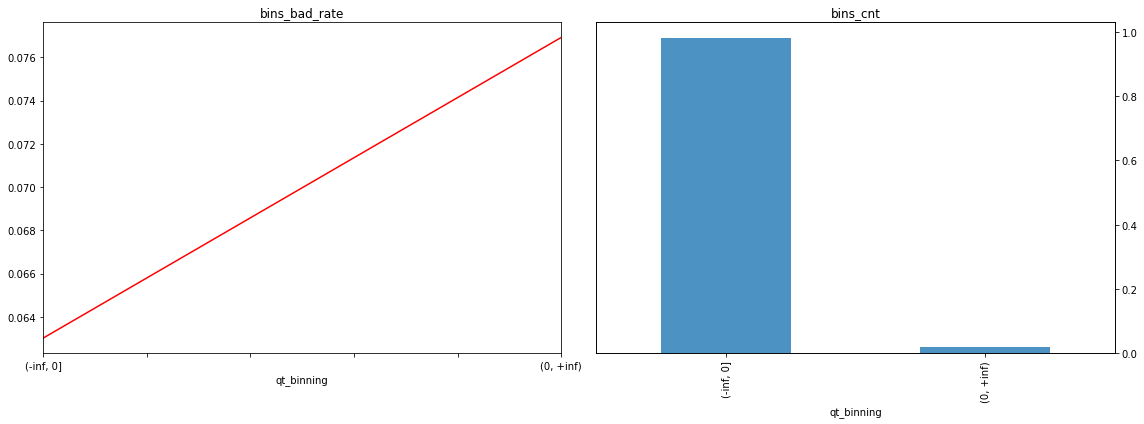

lp_p1_vl_idnbr 变量的IV值为 0.000947401982359791


,Lbound,Ubound,Totalcnt,PctTotal,Y_count,n_Y_count,Y_pct,n_Y_pct,Y_rate,WOE,IV
qt_binning,,,,,,,,,,,
"(-inf, 0]",0,0,8633,0.9808,544,8089,0.976661,0.981079,0.063014,-0.004514,0.000020
"(0, +inf)",1,1,169,0.0192,13,156,0.023339,0.018921,0.076923,0.209890,0.000927


In [59]:
var_name = 'lp_p1_vl_idnbr' #变量
var_bin = variable_binning(data_form, target, var_name, [0], 'bins')
binning_plot(var_bin)
print(var_name,'变量的IV值为',var_bin['IV'].sum())
var_bin_ls_bs_add5=var_bin['WOE']
var_bin.sort_values('Lbound')

## 模型训练

In [66]:
import statsmodels.api as sm
from sklearn.metrics import roc_auc_score,roc_curve,auc
import matplotlib.pylab as plb

In [307]:
selected_var={
    #'cs_size_s':[0],
    'cs_size_s_ctn_l_rel_m':[0],
 #'cs_size_s_ctn_m_rel_m':[0],
 #'cs_size_s_ctn_m_rel_l':[0],
 'cs_size_s_ctn_l_rel_l':[0],
               #'od':[0],
                #'ls_od_b_1y':[0],
                #'ls_od_b_2y':[0],
                #'ls_od_f_6t':[0],
               #'xc_behavior':[0],
               'xc_overloan':[0],
               'lp_p1_xc_overloan':[0],
               #'xc_overdue':[0],
               #'xc_record':[0],
               #'rv':[0],
               #'rc_idname_multi':[0],
                #'rc_relation_age':[0],
                #'rc_relation_multi':[0],
                #'rc_relation_cnt':[0],
               #'ls_cr':[0],
               #'ls_cr_cl':[0],
               #'ls_gp':[0],
               #'ls_gp_cl':[0],
               'ls_nd':[0],
                #'ld_gps5_rc':[0],
'ld_add5_rc':[0],
'ld_add5_xc_ml':[0],
'ld_add5_xc_m':[0],
#'lp_p1_ld_add5_od':[0],
#'lp_p1_ld_add5_rc':[0],
                 'cg_add5':[0],
               #'bs_gps5':[0],
#'bs_add5_id6plus_dist_c':[0],
'bs_add5_id6plus_dist_vf':[0],
#'bs_add5_id6plus_dist_vc':[0],
#'lp_p1_ld_idnbr_6plus_xcp':[0],
 'lp_p1_vl_idnbr':[0]
               
              }

In [389]:
#WOE变换
WOE_train = WOE_mapping(data_form,selected_var, target)
train_X = WOE_train.drop(target, axis = 1)
train_X['constant'] = 1
train_Y = WOE_train[target]

C:\Users\xiongjun\AppData\Local\Continuum\Anaconda3\lib\site-packages\pandas\core\generic.py:3295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
C:\Users\xiongjun\sc_func.py:124: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df['qt_binning'] = var_bins_series(df[var], bins, side = side)


In [390]:
logit = sm.Logit(train_Y, train_X).fit()
logit_params=logit.params
logit.summary()

Optimization terminated successfully.
         Current function value: 0.278564
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                   type   No. Observations:                 4465
Model:                          Logit   Df Residuals:                     4453
Method:                           MLE   Df Model:                           11
Date:                Tue, 08 May 2018   Pseudo R-squ.:                 0.02503
Time:                        16:54:29   Log-Likelihood:                -1243.8
converged:                       True   LL-Null:                       -1275.7
                                        LLR p-value:                 1.762e-09
===========================================================================================
                              coef    std err          z      P>|z|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------------------
cs_size_s_ctn_l_rel_m       1.0070      0.772      1.304      0.192        -0.506     2.520
cs_size_s_ctn_l_rel_l       1.1841      1.959      0.604      0.546        -2.655     5.024
xc_overloan                 1.0146      0.189      5.368      0.000         0.644     1.385
lp_p1_xc_overloan           0.5882      0.500      1.177      0.239        -0.391     1.568
ls_nd                       0.6820      0.239      2.852      0.004         0.213     1.151
ld_add5_rc                  0.5978      1.293      0.462      0.644        -1.936     3.131
ld_add5_xc_ml               0.5235      1.015      0.516      0.606        -1.466     2.513
ld_add5_xc_m                0.5652      0.989      0.572      0.568        -1.373     2.503
cg_add5                     0.6813      0.982      0.694      0.488        -1.243     2.605
bs_add5_id6plus_dist_vf     0.7790      1.185      0.658      0.511        -1.543     3.101
lp_p1_vl_idnbr             18.3426     21.275      0.862      0.389       -23.356    60.041
constant                   -2.4052      0.056    -43.198      0.000        -2.514    -2.296
===========================================================================================
"""

In [391]:
#KS值
predict_Y = logit.predict(train_X)
KS_calculation(train_Y,predict_Y, 40)

0.22349239349239478

In [392]:
#ROC值
roc_auc_score(train_Y,predict_Y)

0.62413655413655411

## 打分

In [393]:
import math
score_data=data_form[['type']]
score_data['probability'] = predict_Y

#风险odds=15:1时，基本分数为500分
#风险翻倍时，即odds=15:2时，分数降低50分
B = 50/math.log(2, math.e)
A = 500 + B * math.log(1/15,math.e)

score_data['odds'] = (score_data['probability']/(1-score_data['probability']) ).apply(lambda x: math.log(x, math.e))
score_data['score'] = A - B * score_data['odds']

C:\Users\xiongjun\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
C:\Users\xiongjun\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\xiongjun\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value ins

In [394]:
score_data['score'].sum()/score_data.shape[0]

484.13485615431193

In [395]:
score_data[score_data['score']<=600].shape[0]

4465

In [396]:
score_data[score_data['score']<=560].shape[0]/score_data.shape[0]

1.0

In [397]:
score_data[(score_data.score<=560) & (score_data.type==1)].shape[0]/score_data[score_data['score']<=560].shape[0]

0.08286674132138858

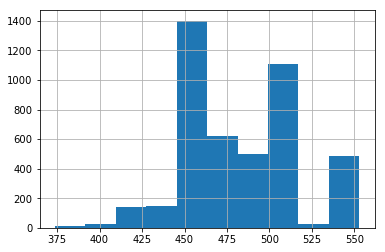

In [398]:
#分数区间
score_data.score.hist()
plt.show()

In [428]:
#分数分段
var_name = 'score' #变量
bins=[373,391,409,427,445,463,481,499,517,535,553]
#bins=10
var_bin = variable_binning(score_data, target, var_name, bins, 'bins')
#var_bin.sort_values('Lbound')

C:\Users\xiongjun\AppData\Local\Continuum\Anaconda3\lib\site-packages\pandas\core\generic.py:3295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
C:\Users\xiongjun\sc_func.py:124: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df['qt_binning'] = var_bins_series(df[var], bins, side = side)


In [429]:
def binning_plot(df):
    '''
    plot Y_rate and bin_percent curves
    '''
    plt.figure(figsize=(16, 5))
    plt.subplot(121)
    df['Y_rate'].plot()
    plt.title('bins_bad_rate')

    plt.subplot(122)
    df['PctTotal'].plot.bar(secondary_y=True,alpha = 0.8, grid = False)
    plt.title('bins_cnt')
    
    plt.tight_layout()
    plt.show()

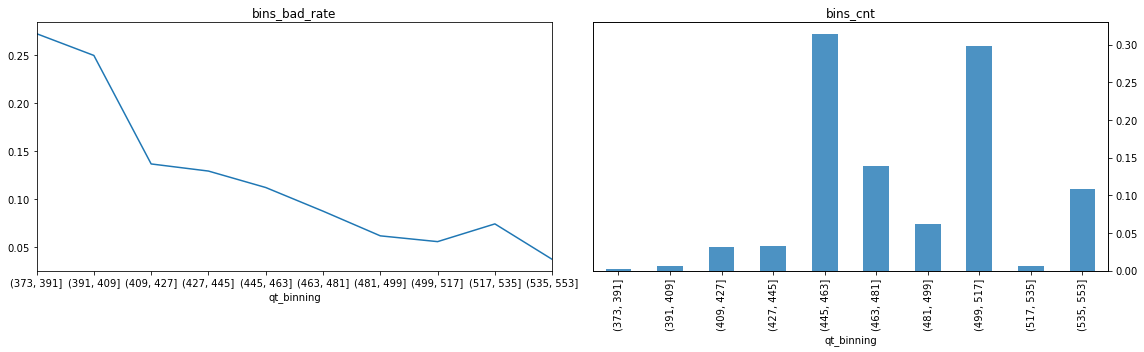

In [430]:
binning_plot(var_bin)

In [431]:
var_bin

,Lbound,Ubound,Totalcnt,PctTotal,Y_count,n_Y_count,Y_pct,n_Y_pct,Y_rate,WOE,IV
qt_binning,,,,,,,,,,,
"(373, 391]",373.715654,390.141050,11,0.002464,3,8,0.008108,0.001954,0.272727,1.423190,0.008759
"(391, 409]",397.434322,408.344934,28,0.006271,7,21,0.018919,0.005128,0.250000,1.305407,0.018002
"(409, 427]",411.566633,426.778394,139,0.031131,19,120,0.051351,0.029304,0.136691,0.560966,0.012368
"(427, 445]",428.849900,443.723659,147,0.032923,19,128,0.051351,0.031258,0.129252,0.496428,0.009975
"(445, 463]",445.791021,462.937387,1401,0.313774,157,1244,0.424324,0.303785,0.112063,0.334178,0.040281
"(463, 481]",464.633518,478.186653,618,0.138410,54,564,0.145946,0.137729,0.087379,0.057949,0.000476
"(481, 499]",482.117888,493.459905,276,0.061814,17,259,0.045946,0.063248,0.061594,-0.319596,0.005530
"(499, 517]",499.059008,516.758603,1332,0.298320,74,1258,0.200000,0.307204,0.055556,-0.429194,0.046011
"(517, 535]",521.868283,530.375190,27,0.006047,2,25,0.005405,0.006105,0.074074,-0.121710,0.000085


## 变量分组打分

In [455]:
selected_var={
    #'cs_size_s':[0],
    'cs_size_s_ctn_l_rel_m':[0],
 #'cs_size_s_ctn_m_rel_m':[0],
 #'cs_size_s_ctn_m_rel_l':[0],
 'cs_size_s_ctn_l_rel_l':[0],
               #'od':[0],
                #'ls_od_b_1y':[0],
                #'ls_od_b_2y':[0],
                #'ls_od_f_6t':[0],
               #'xc_behavior':[0],
               'xc_overloan':[0],
               'lp_p1_xc_overloan':[0],
               #'xc_overdue':[0],
               #'xc_record':[0],
               #'rv':[0],
               #'rc_idname_multi':[0],
                #'rc_relation_age':[0],
                #'rc_relation_multi':[0],
                #'rc_relation_cnt':[0],
               #'ls_cr':[0],
               #'ls_cr_cl':[0],
               #'ls_gp':[0],
               #'ls_gp_cl':[0],
               'ls_nd':[0],
                #'ld_gps5_rc':[0],
'ld_add5_rc':[0],
'ld_add5_xc_ml':[0],
'ld_add5_xc_m':[0],
#'lp_p1_ld_add5_od':[0],
#'lp_p1_ld_add5_rc':[0],
                 'cg_add5':[0],
               #'bs_gps5':[0],
#'bs_add5_id6plus_dist_c':[0],
'bs_add5_id6plus_dist_vf':[0],
#'bs_add5_id6plus_dist_vc':[0],
#'lp_p1_ld_idnbr_6plus_xcp':[0],
 'lp_p1_vl_idnbr':[0]
               
              }
#各变量分组的WOE集合放在一个字典中
def var_woe_result(df, target, select_var):
    output_df = select_var
    var_list = list(select_var.keys())
    for i in var_list:
        output_df[i] = variable_binning(df, target, i,select_var.get(i), 'bins')['WOE'] #select_var.get(i)返回字典中键的关联值即分组的切割值bin
    return output_df

var_woe_result=var_woe_result(data_form,target,selected_var)

C:\Users\xiongjun\AppData\Local\Continuum\Anaconda3\lib\site-packages\pandas\core\generic.py:3295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
C:\Users\xiongjun\sc_func.py:124: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df['qt_binning'] = var_bins_series(df[var], bins, side = side)


In [456]:
#乘以模型参数得出变量分
variable_score=var_woe_result
var_list = list(var_woe_result.keys())
for i in var_list:
    variable_score[i] = var_woe_result.get(i)*logit_params[i]*B*(-1)

In [457]:
variable_score

{'bs_add5_id6plus_dist_vf': qt_binning
 (-inf, 0]    1.574918
 (0, +inf)   -5.202630
 Name: WOE, dtype: float64, 'cg_add5': qt_binning
 (-inf, 0]     0.427875
 (0, +inf)   -16.513245
 Name: WOE, dtype: float64, 'cs_size_s_ctn_l_rel_l': qt_binning
 (-inf, 0]    0.911735
 (0, +inf)   -6.381537
 Name: WOE, dtype: float64, 'cs_size_s_ctn_l_rel_m': qt_binning
 (-inf, 0]     1.086055
 (0, +inf)   -22.227720
 Name: WOE, dtype: float64, 'ld_add5_rc': qt_binning
 (-inf, 0]     0.107166
 (0, +inf)   -26.399835
 Name: WOE, dtype: float64, 'ld_add5_xc_m': qt_binning
 (-inf, 0]     4.112424
 (0, +inf)   -11.099337
 Name: WOE, dtype: float64, 'ld_add5_xc_ml': qt_binning
 (-inf, 0]     3.503124
 (0, +inf)   -10.629187
 Name: WOE, dtype: float64, 'lp_p1_vl_idnbr': qt_binning
 (-inf, 0]     0.508667
 (0, +inf)   -23.224258
 Name: WOE, dtype: float64, 'lp_p1_xc_overloan': qt_binning
 (-inf, 0]     0.510965
 (0, +inf)   -33.713423
 Name: WOE, dtype: float64, 'ls_nd': qt_binning
 (-inf, 0]    -4.594598
 (

In [458]:
logit_params['constant']*B

-173.4951235260456

## 模型基础分数

In [459]:
base_score=A-logit_params['constant']*B
base_score

478.15059374561963

In [460]:
B

72.13475204444818

In [461]:
A

304.65547021957406

In [462]:
#打分详情下载
import math
score_data1=data_form[['type',
                'ls_od_b_1y',
                'ls_od_b_2y',
               'xc_overloan',
               'xc_overdue',
               'rv',
               'rc_idname_multi',
                'rc_relation_cnt',
               'ls_cr',
               'ls_cr_cl',
               'ls_gp',
               'ls_nd',
               'ld_xc',
               'bs_gps5']]
score_data1['probability'] = predict_Y

#风险odds=15:1时，基本分数为660分
#风险翻倍时，即odds=15:2时，分数降低50分
B = 50/math.log(2, math.e)
A = 500 + B * math.log(1/15,math.e)

score_data1['odds'] = (score_data['probability']/(1-score_data['probability']) ).apply(lambda x: math.log(x, math.e))
score_data1['score'] = A - B * score_data['odds']

KeyError: "['ld_xc'] not in index"

## 低分段人群的规则命中情况

In [463]:
#低分段人群的规则命中分布
columns1=list(score_data1.columns)
rules1=pd.Series(index=columns1)
for i in columns1:  
         rules1[i]=score_data1[(score_data1.score<=450)& (score_data1[i]==1) ].shape[0]/score_data1[score_data1['score']<=450].shape[0]

NameError: name 'score_data1' is not defined

In [32]:
rules

type               0.153203
ls_od_b_1y         0.001448
ls_od_b_2y         0.001226
xc_overloan        0.999443
xc_overdue         0.084457
rv                 0.066184
rc_idname_multi    0.029304
rc_relation_cnt    0.050808
ls_cr              0.000000
ls_cr_cl           0.000111
ls_gp              0.011588
ls_nd              0.001448
ld_xc              0.295710
bs_gps5            0.057382
probability        0.000000
odds               0.000000
score              0.000000
dtype: float64

In [112]:
#低分段人群的规则命中时的bad_rate
columns1=list(score_data1.columns)
rules2=pd.Series(index=columns1)
for i in columns1:
    if(score_data1[(score_data1.score<=450)& (score_data1[i]==1) ].shape[0]==0):
        rules2[i]=0
    else:
         rules2[i]=score_data1[(score_data1.score<=450)& (score_data1[i]==1)& (score_data1.type==1)].shape[0]/score_data1[(score_data1.score<=450)& (score_data1[i]==1) ].shape[0]

In [113]:
rules2

type               1.000000
ls_od_b_1y         0.230769
ls_od_b_2y         0.181818
xc_overloan        0.153066
xc_overdue         0.164908
rv                 0.136364
rc_idname_multi    0.155894
rc_relation_cnt    0.160088
ls_cr              0.000000
ls_cr_cl           0.000000
ls_gp              0.134615
ls_nd              0.000000
ld_xc              0.150339
bs_gps5            0.149515
probability        0.000000
odds               0.000000
score              0.000000
dtype: float64

In [289]:
#详情下载
score_data1.to_csv('score_data1.csv')

## 高分段人数

In [115]:
#低分段人群的规则命中分布
columns3=list(score_data1.columns)
rules3=pd.Series(index=columns1)
for i in columns1:  
         rules3[i]=score_data1[(score_data1.score>450)& (score_data1[i]==1) ].shape[0]/score_data1[score_data1['score']>450].shape[0]

In [117]:
rules3

type               0.056913
ls_od_b_1y         0.000885
ls_od_b_2y         0.000491
xc_overloan        0.163120
xc_overdue         0.058338
rv                 0.060500
rc_idname_multi    0.020937
rc_relation_cnt    0.031602
ls_cr              0.091709
ls_cr_cl           0.326633
ls_gp              0.030373
ls_nd              0.265641
ld_xc              0.446454
bs_gps5            0.048508
probability        0.000000
odds               0.000000
score              0.000000
dtype: float64

## 测试样本

In [464]:
#数据集时间段：2018-02/26-2018-03/07
data_test1 = pd.read_csv('D:\\python\\huabao\\tmp_score_nuoya_variable0508_1.csv')
#数据集时间段：2018-02/10-2018-02/25
data_test2 = pd.read_csv('D:\\python\\huabao\\tmp_score_nuoya_variable0508_2.csv')
data_test=data_test1.append(data_test2)
#data_test=data_test2
data_test.shape

(5101, 64)

In [465]:
#样本的bad_rate
data_test[data_test['type']==1].shape[0]/data_test.shape[0]

0.03783571848657126

### 测试样本区隔力KS

In [466]:
selected_var={
    #'cs_size_s':[0],
    'cs_size_s_ctn_l_rel_m':[0],
 #'cs_size_s_ctn_m_rel_m':[0],
 #'cs_size_s_ctn_m_rel_l':[0],
 'cs_size_s_ctn_l_rel_l':[0],
               #'od':[0],
                #'ls_od_b_1y':[0],
                #'ls_od_b_2y':[0],
                #'ls_od_f_6t':[0],
               #'xc_behavior':[0],
               'xc_overloan':[0],
               'lp_p1_xc_overloan':[0],
               #'xc_overdue':[0],
               #'xc_record':[0],
               #'rv':[0],
               #'rc_idname_multi':[0],
                #'rc_relation_age':[0],
                #'rc_relation_multi':[0],
                #'rc_relation_cnt':[0],
               #'ls_cr':[0],
               #'ls_cr_cl':[0],
               #'ls_gp':[0],
               #'ls_gp_cl':[0],
               'ls_nd':[0],
                #'ld_gps5_rc':[0],
'ld_add5_rc':[0],
'ld_add5_xc_ml':[0],
'ld_add5_xc_m':[0],
#'lp_p1_ld_add5_od':[0],
#'lp_p1_ld_add5_rc':[0],
                 'cg_add5':[0],
               #'bs_gps5':[0],
#'bs_add5_id6plus_dist_c':[0],
'bs_add5_id6plus_dist_vf':[0],
#'bs_add5_id6plus_dist_vc':[0],
#'lp_p1_ld_idnbr_6plus_xcp':[0],
 'lp_p1_vl_idnbr':[0]
               
              }
#WOE变换
WOE_test = WOE_mapping(data_test,selected_var, target)
test_X = WOE_test.drop(target, axis = 1)
test_X['constant'] = 1
test_Y = WOE_test[target]

#KS值
predict_test_Y = logit.predict(test_X)
KS_calculation(test_Y,predict_test_Y, 40)

C:\Users\xiongjun\AppData\Local\Continuum\Anaconda3\lib\site-packages\pandas\core\generic.py:3295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
C:\Users\xiongjun\sc_func.py:124: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df['qt_binning'] = var_bins_series(df[var], bins, side = side)


0.12884570395800857

In [467]:
roc_auc_score(test_Y,predict_test_Y)

0.55234976415791492

## 测试样本分数分布

In [468]:
import math
score_test=data_test[['type']]
score_test['probability'] = predict_test_Y

#风险odds=15:1时，基本分数为660分
#风险翻倍时，即odds=15:2时，分数降低50分
B = 50/math.log(2, math.e)
A = 500 + B * math.log(1/15,math.e)

score_test['odds'] = (score_test['probability']/(1-score_test['probability']) ).apply(lambda x: math.log(x, math.e))
score_test['score'] = A - B * score_test['odds']

C:\Users\xiongjun\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
C:\Users\xiongjun\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\xiongjun\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value ins

In [533]:
#分数分段
bins=[456,475,495,515]
#bins=5

var_bin_test = variable_binning(score_test, target, var_name, bins, 'bins')
#var_bin.sort_values('Lbound')

C:\Users\xiongjun\AppData\Local\Continuum\Anaconda3\lib\site-packages\pandas\core\generic.py:3295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
C:\Users\xiongjun\sc_func.py:124: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df['qt_binning'] = var_bins_series(df[var], bins, side = side)


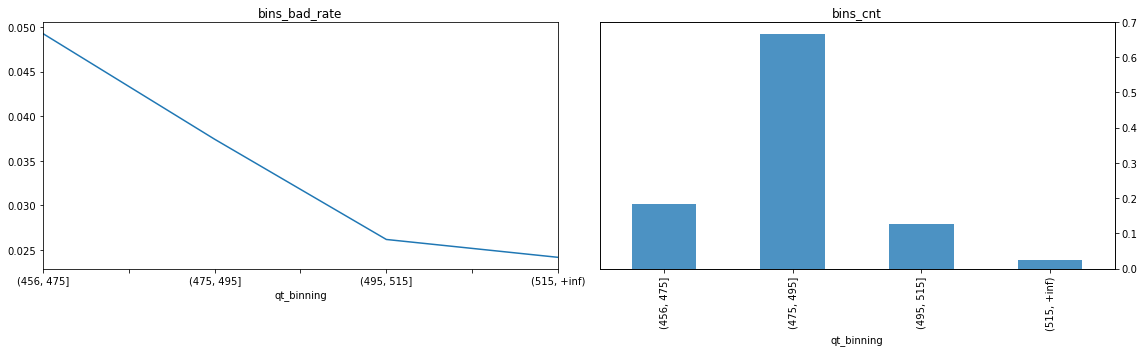

In [534]:
binning_plot(var_bin_test)

In [535]:
var_bin_test

,Lbound,Ubound,Totalcnt,PctTotal,Y_count,n_Y_count,Y_pct,n_Y_pct,Y_rate,WOE,IV
qt_binning,,,,,,,,,,,
"(456, 475]",456.109661,474.065879,934,0.183101,46,888,0.238342,0.180929,0.049251,0.275601,0.015823
"(475, 495]",475.136951,493.604750,3394,0.665360,127,3267,0.658031,0.665648,0.037419,-0.011509,0.000088
"(495, 515]",495.021419,513.233885,649,0.127230,17,632,0.088083,0.128769,0.026194,-0.379744,0.015450
"(515, +inf)",518.825808,932.446891,124,0.024309,3,121,0.015544,0.024654,0.024194,-0.461247,0.004202


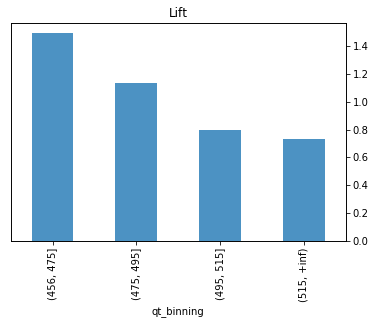

In [529]:
var_bin_test['Lift']=var_bin_test['Y_rate']/0.033
var_bin_test['Lift'].plot.bar(secondary_y=True,alpha = 0.8, grid = False)
plt.title('Lift')
plt.show()

## 测试样本稳定性PSI

In [40]:
def model_psi(var_bin,var_bin_test):
    PSI_in=pd.DataFrame()
    PSI_in['Y_pct1']=var_bin.PctTotal
    PSI_in['Y_pct2']=var_bin_test.PctTotal
    psi_result=pd.DataFrame()
    psi_result['rate1'] = (PSI_in['Y_pct1']/PSI_in['Y_pct2']).map(lambda x:log(x))
    psi_result['rate2'] = (PSI_in['Y_pct1'] - PSI_in['Y_pct2']) * psi_result['rate1']
    psi = psi_result['rate2'].sum()
    return psi_result

In [41]:
psi_result=model_psi(var_bin,var_bin_test)
psi = psi_result['rate2'].sum()
psi

0.03786984775983998

In [42]:
var_bin.PctTotal

qt_binning
(-inf, 430]    0.067185
(430, 450]     0.238899
(450, 490]     0.251620
(490, 500]     0.177614
(500, +inf)    0.264682
Name: PctTotal, dtype: float64

In [43]:
var_bin_test.PctTotal

qt_binning
(-inf, 430]    0.061837
(430, 450]     0.208388
(450, 490]     0.198891
(490, 500]     0.187938
(500, +inf)    0.342946
Name: PctTotal, dtype: float64

In [44]:
psi_result['rate2']

qt_binning
(-inf, 430]    0.000444
(430, 450]     0.004169
(450, 490]     0.012400
(490, 500]     0.000583
(500, +inf)    0.020274
Name: rate2, dtype: float64

## 诺亚点点数据测试

In [46]:
data_tg = pd.read_csv('D:\\python\\huabao\\tmp_score_nuoya_daihou_test_0326.csv')
#data_tg['type']=1 #加个常数项做type列，方便后面调用函数运算
data_tg.shape

(4565, 15)

In [47]:
#样本的bad_rate
data_tg[data_tg['type']==1].shape[0]/data_tg.shape[0]

0.07097480832420591

In [48]:
data_tg[data_tg['type']==1].shape[0]

324

In [131]:
bins_tg =[450,500,520,550]
var_bin_tg = variable_binning(data_tg, target, var_name, bins_tg, 'bins')

C:\Users\xiongjun\AppData\Local\Continuum\Anaconda3\lib\site-packages\pandas\core\generic.py:3295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
C:\Users\xiongjun\sc_func.py:124: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df['qt_binning'] = var_bins_series(df[var], bins, side = side)


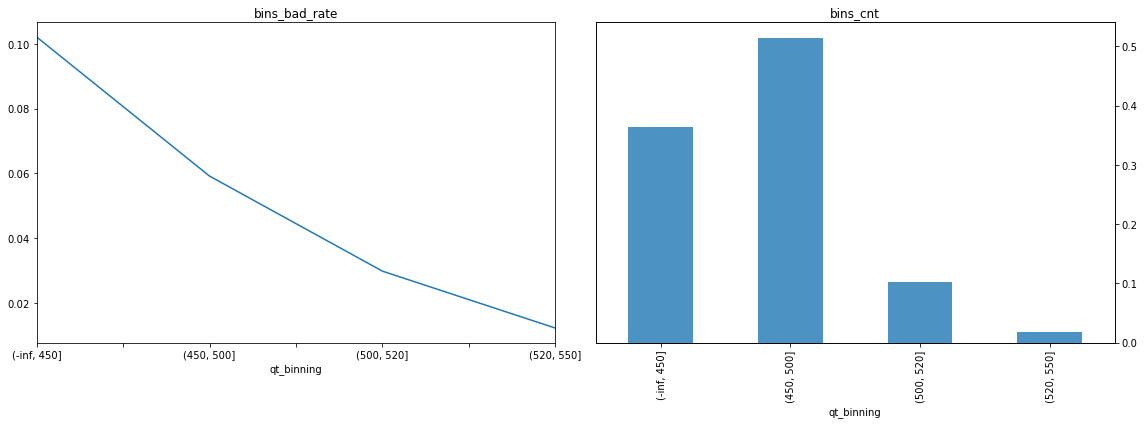

In [132]:
binning_plot(var_bin_tg)

In [133]:
var_bin_tg

,Lbound,Ubound,Totalcnt,PctTotal,Y_count,n_Y_count,Y_pct,n_Y_pct,Y_rate,WOE,IV
qt_binning,,,,,,,,,,,
"(-inf, 450]",409,442,1664,0.364513,170,1494,0.524691,0.352275,0.102163,0.398397,0.068690
"(450, 500]",452,498,2349,0.514567,139,2210,0.429012,0.521104,0.059174,-0.194463,0.017908
"(500, 520]",502,519,470,0.102957,14,456,0.043210,0.107522,0.029787,-0.911625,0.058628
"(520, 550]",527,543,82,0.017963,1,81,0.003086,0.019099,0.012195,-1.822638,0.029186


In [138]:
psi_result=model_psi(var_bin,var_bin_tg)
psi = psi_result['rate2'].sum()
psi

0.17509378282699134

In [78]:
4565/533519

0.008556396304536484

In [110]:
selected_var ={#'cs':[0,4,5,6,7],
               #'od':[0],
                'ls_od_b_1y':[0],
                'ls_od_b_2y':[0],
                #'ls_od_f_6t':[0],
               #'xc_behavior':[0],
               'xc_overloan':[0],
               'xc_overdue':[0],
               #'xc_record':[0],
               'rv':[0],
               'rc_idname_multi':[0],
                #'rc_relation_age':[0],
                #'rc_relation_multi':[0],
                'rc_relation_cnt':[0],
               'ls_cr':[0],
               'ls_cr_cl':[0],
               'ls_gp':[0],
               #'ls_gp_cl':[0],
               'ls_nd':[0],
               #'ld_rc':[0],
               'ld_xc':[0],
               'bs_gps5':[0]
              }
#WOE变换
WOE_tg = WOE_mapping(data_tg,selected_var, target)
tg_X = WOE_tg.drop(target, axis = 1)
tg_X['constant'] = 1
tg_Y = WOE_tg[target]

#KS值
predict_tg_Y = logit.predict(tg_X)
KS_calculation(tg_Y,predict_tg_Y, 40)

C:\Users\xiongjun\AppData\Local\Continuum\Anaconda3\lib\site-packages\pandas\core\generic.py:3295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
C:\Users\xiongjun\sc_func.py:124: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df['qt_binning'] = var_bins_series(df[var], bins, side = side)


0.18182658410985086

In [55]:
roc_auc_score(tg_Y,predict_tg_Y)

0.62176875649523611

## 算话评分测试

In [66]:
data_sh = pd.read_csv('D:\\python\\huabao\\tmp_suanhua_test0326.csv')
#data_tg['type']=1 #加个常数项做type列，方便后面调用函数运算
data_sh.shape

(4705, 5)

In [67]:
#样本的bad_rate
data_sh[data_sh['type']==1].shape[0]/data_sh.shape[0]

0.15175345377258237

In [69]:
data_sh[data_sh['type']==1].shape[0]

714

In [90]:
bins_sh =[500,530,540,550,560,570,580]
var_sh1='score1'
var_bin_sh1 = variable_binning(data_sh, target, var_sh1, bins_sh, 'bins')

C:\Users\xiongjun\AppData\Local\Continuum\Anaconda3\lib\site-packages\pandas\core\generic.py:3295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
C:\Users\xiongjun\sc_func.py:124: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df['qt_binning'] = var_bins_series(df[var], bins, side = side)


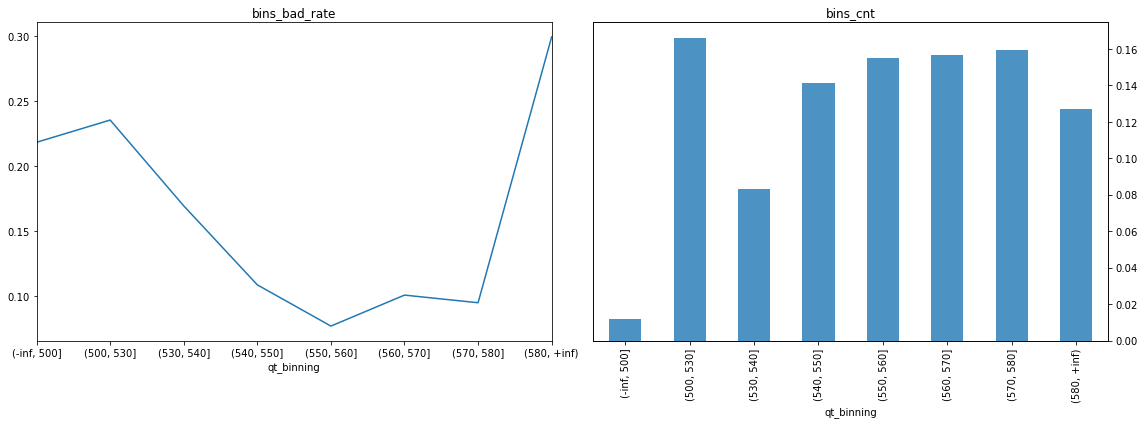

In [91]:
binning_plot(var_bin_sh1)

In [92]:
var_bin_sh1

,Lbound,Ubound,Totalcnt,PctTotal,Y_count,n_Y_count,Y_pct,n_Y_pct,Y_rate,WOE,IV
qt_binning,,,,,,,,,,,
"(-inf, 500]",488,500,55,0.011690,12,43,0.016807,0.010774,0.218182,0.444621,0.002682
"(500, 530]",501,530,782,0.166206,184,598,0.257703,0.149837,0.235294,0.542259,0.058491
"(530, 540]",531,540,390,0.082891,66,324,0.092437,0.081183,0.169231,0.129825,0.001461
"(540, 550]",541,550,664,0.141126,72,592,0.100840,0.148334,0.108434,-0.385926,0.018329
"(550, 560]",551,560,730,0.155154,56,674,0.078431,0.168880,0.076712,-0.766964,0.069371
"(560, 570]",561,570,736,0.156429,74,662,0.103641,0.165873,0.100543,-0.470286,0.029267
"(570, 580]",571,580,750,0.159405,71,679,0.099440,0.170133,0.094667,-0.537027,0.037964
"(580, +inf)",581,607,598,0.127099,179,419,0.250700,0.104986,0.299331,0.870429,0.126834


## score2

In [106]:
#bins_sh =[530,540,550,560,600]
bins_sh =[500,530,540,550,560,580,600]
var_sh2='score2'
var_bin_sh2 = variable_binning(data_sh, target, var_sh2, bins_sh, 'bins')

C:\Users\xiongjun\AppData\Local\Continuum\Anaconda3\lib\site-packages\pandas\core\generic.py:3295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
C:\Users\xiongjun\sc_func.py:124: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df['qt_binning'] = var_bins_series(df[var], bins, side = side)


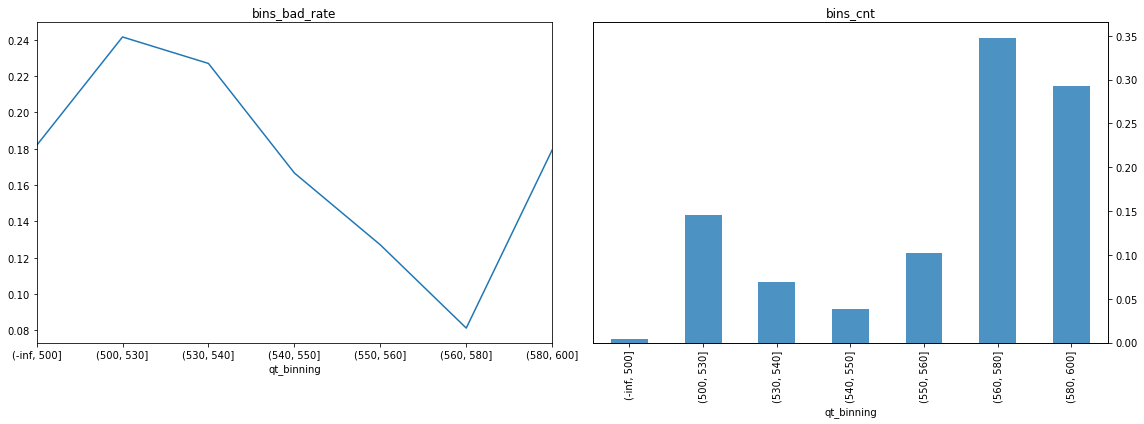

In [107]:
binning_plot(var_bin_sh2)

In [108]:
var_bin_sh2

,Lbound,Ubound,Totalcnt,PctTotal,Y_count,n_Y_count,Y_pct,n_Y_pct,Y_rate,WOE,IV
qt_binning,,,,,,,,,,,
"(-inf, 500]",500,500,22,0.004676,4,18,0.005602,0.004510,0.181818,0.216837,0.000237
"(500, 530]",504,530,683,0.145165,165,518,0.231092,0.129792,0.241581,0.576884,0.058439
"(530, 540]",531,540,326,0.069288,74,252,0.103641,0.063142,0.226994,0.495550,0.020069
"(540, 550]",541,550,180,0.038257,30,150,0.042017,0.037585,0.166667,0.111476,0.000494
"(550, 560]",551,560,480,0.102019,61,419,0.085434,0.104986,0.127083,-0.206083,0.004029
"(560, 580]",561,580,1637,0.347928,133,1504,0.186275,0.376848,0.081246,-0.704620,0.134282
"(580, 600]",581,600,1377,0.292667,247,1130,0.345938,0.283137,0.179375,0.200330,0.012581
